In [1]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [10]:
import json
from datetime import datetime

In [138]:
# note!

# countepart GCNs are done after Event GCN Circular, not notice 
# Event notice is sent earlier and used to treat the data
# one reason of the IBAS GRB delay is packets not written to files fast enough (~30 min)
# counterpart GCNs sometimes wait for NRT data: +3 ti 5 hours

In [78]:
counterpart_gcn_reactions = json.load(open("counterpart_gcn_reaction_summary.json"))

counterpart_gcn_reactions

[{'event': 'LIGO/Virgo S191205ah',
  'event_gcn_time': '19/12/05 22:35:27 GMT',
  'counterpart_gcn_time': '19/12/05 22:47:19 GMT',
  'event_t0': '2019-12-05 21:52:08'},
 {'event': 'LIGO/Virgo S190602aq',
  'event_gcn_time': '19/06/02 18:36:06 GMT',
  'counterpart_gcn_time': '19/06/03 08:50:54 GMT',
  'event_t0': '2019-06-02 17:59:27'},
 {'event': 'LIGO/Virgo S190521g',
  'event_gcn_time': '19/05/21 04:19:51 GMT',
  'counterpart_gcn_time': '19/05/21 05:51:57 GMT',
  'event_t0': '2019-05-21 03:02:29'},
 {'event': 'LIGO/Virgo S191110af',
  'event_gcn_time': '19/11/11 00:15:09 GMT',
  'counterpart_gcn_time': '19/11/11 04:59:34 GMT',
  'event_t0': '2019-11-10 23:06:44'},
 {'event': 'LIGO/Virgo S190910d',
  'event_gcn_time': '19/09/10 02:29:05 GMT',
  'counterpart_gcn_time': '19/09/10 06:14:09 GMT',
  'event_t0': '2019-09-10 01:26:19'},
 {'event': 'LIGO/Virgo S190910h',
  'event_gcn_time': '19/09/10 09:23:20 GMT',
  'counterpart_gcn_time': '19/09/10 09:47:10 GMT',
  'event_t0': '2019-09-10 0

In [79]:
grb_gcn_reactions = json.load(open("grb_gcn_reaction_summary.json"))
grb_gcn_reactions

[{'event': 'GRB 120711A',
  'event_t0': '2012-07-11 02:44:48',
  'event_gcn_time': '12/07/11 04:28:05 GMT'},
 {'event': 'GRB 070311',
  'event_t0': '2007-03-11 01:52:50',
  'event_gcn_time': '07/03/11 03:06:14 GMT'},
 {'event': 'GRB021219',
  'event_t0': '2002-12-19 07:33:57',
  'event_gcn_time': '02/12/19 12:36:03 GMT'},
 {'event': 'GRB 081226B',
  'event_t0': '2008-12-26 12:13:11',
  'event_gcn_time': '08/12/26 14:24:19 GMT'},
 {'event': 'GRB 131224A',
  'event_t0': '2013-12-24 16:54:37',
  'event_gcn_time': '13/12/24 18:17:19 GMT'},
 {'event': 'GRB 071109',
  'event_t0': '2007-11-09 20:36:05',
  'event_gcn_time': '07/11/09 21:41:34 GMT'},
 {'event': 'GRB 180222A',
  'event_t0': '2018-02-22 13:10:02',
  'event_gcn_time': '18/02/22 14:19:25 GMT'},
 {'event': 'GRB 130514B',
  'event_t0': '2013-05-14 13:26:32',
  'event_gcn_time': '13/05/14 14:56:00 GMT'},
 {'event': 'GRB 050502',
  'event_t0': '2005-05-02 02:13:56',
  'event_gcn_time': '05/05/02 10:19:06 GMT'},
 {'event': 'GRB 160223B'

In [42]:
def dt(x):
    try:
        return datetime.strptime(x, "%y/%m/%d %H:%M:%S GMT")
    except:
        return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    
ts = lambda x:dt(x).timestamp()

In [25]:
import matplotlib.font_manager as font_manager

<IPython.core.display.Javascript object>


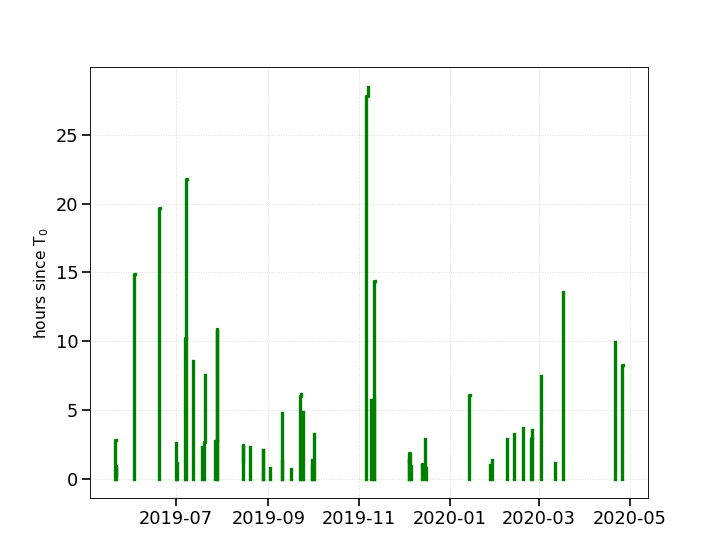

Text(0, 0.5, 'hours since T$_{0}$')

In [96]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

for E in counterpart_gcn_reactions:
    plt.plot(
            [dt(E['event_t0']), dt(E['event_gcn_time']), dt(E['counterpart_gcn_time'])],        
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600., (ts(E['counterpart_gcn_time'])-ts(E['event_t0']))/3600.], 
            lw=3,
            c='g',
            ds='steps'
        )

ax.set_ylabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

    

In [100]:
from collections import defaultdict

counterpart_gcn_reactions_by_year=defaultdict(list)
for E in counterpart_gcn_reactions:
    counterpart_gcn_reactions_by_year[dt(E['event_t0']).year].append(E)
    

grb_gcn_reactions_by_year = defaultdict(list)
for E in grb_gcn_reactions:
    grb_gcn_reactions_by_year[dt(E['event_t0']).year].append(E)
    

<IPython.core.display.Javascript object>


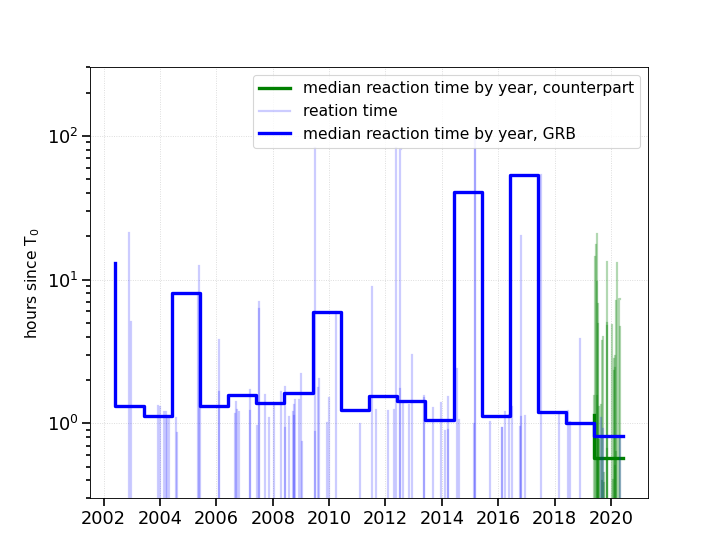

In [134]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

for E in counterpart_gcn_reactions:
    plt.plot(
            [dt(E['event_gcn_time']), dt(E['counterpart_gcn_time'])],        
            [0, (ts(E['counterpart_gcn_time'])-ts(E['event_gcn_time']))/3600.], 
            lw=2,
            c='g',
            ds='steps',
            alpha=0.3
        )
    
    
plt.step(
    [datetime(year=yr, month=6, day=1) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    [np.median([(ts(E['event_gcn_time'])-ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(counterpart_gcn_reactions_by_year.items())],
    lw=3,
    c='g',
    label='median reaction time by year, counterpart'
)

###### GRB
    

def m(E):
    if (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600.>100: return False
    return True
    
label = 'reation time'
for E in grb_gcn_reactions:
    if not m(E): continue
    
    plt.plot(
            [dt(E['event_t0']), dt(E['event_gcn_time'])],        
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600.], 
            lw=2,
            c='b',
            ds='steps',
            alpha=0.2,
            label=label
        )
    label=None

plt.step(
    [datetime(year=yr, month=6, day=1) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    [np.median([(ts(E['event_gcn_time'])-ts(E['event_t0']))/3600. for E in gl]) for yr, gl  in sorted(grb_gcn_reactions_by_year.items())],
    lw=3,
    c='b',
    label='median reaction time by year, GRB'
)

plt.legend(prop=font_manager.FontProperties(size=14))

plt.ylim([0.3,300])


plt.semilogy()

ax.set_ylabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

plt.savefig("reaction_time_history.png")
    

<IPython.core.display.Javascript object>


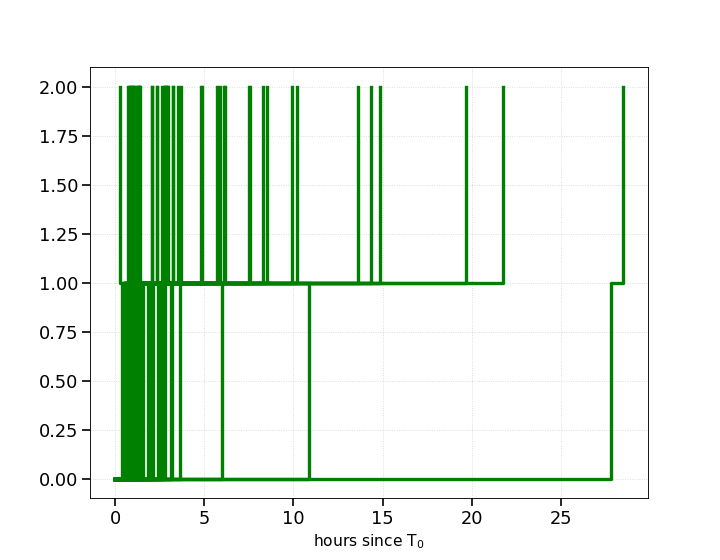

Text(0.5, 0, 'hours since T$_{0}$')

In [50]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

for E in gcn_reactions:
    plt.plot(
            [0, (ts(E['event_gcn_time'])-ts(E['event_t0']))/3600., (ts(E['counterpart_gcn_time'])-ts(E['event_t0']))/3600.], 
            [0, 1, 2],                    
            lw=3,
            c='g',
            ds='steps-post'
        )

ax.set_xlabel("hours since T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

    

<IPython.core.display.Javascript object>


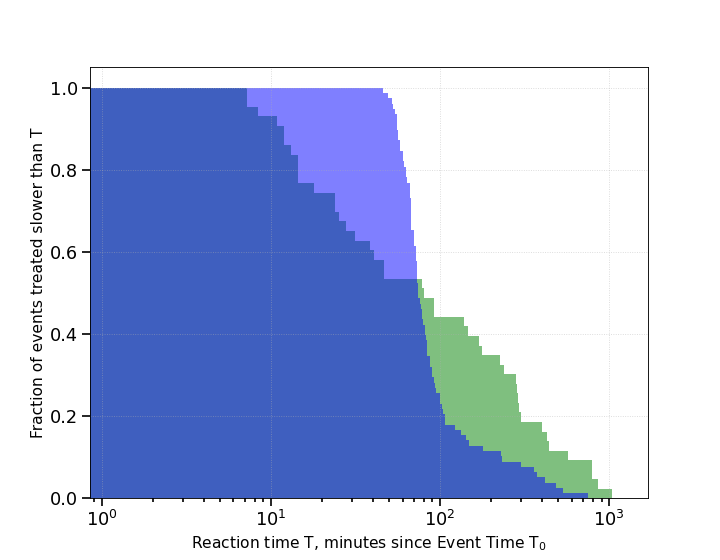

In [139]:
plt.figure(figsize=(9,7))

ax=plt.gca()

ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

plt.grid(ls=":", alpha=0.5)

plt.hist(
            [(ts(E['counterpart_gcn_time'])-ts(E['event_gcn_time']))/60. for E in counterpart_gcn_reactions], 
            bins=np.linspace(0,20*60,1000),
            lw=3,
            color='g',
            cumulative=-1,
            density=True,
            alpha=0.5,
            #ds='steps-post'
        )

plt.hist(
            [(ts(E['event_gcn_time'])-ts(E['event_t0']))/60. for E in grb_gcn_reactions], 
            bins=np.linspace(0,20*60,1000),
            lw=3,
            color='b',
            cumulative=-1,
            density=True,
            alpha=0.5,
            #ds='steps-post'
        )


ax.set_xlabel("Reaction time T, minutes since Event Time T$_{0}$", fontproperties=font_manager.FontProperties(size=14))

ax.set_ylabel("Fraction of events treated slower than T", fontproperties=font_manager.FontProperties(size=14))

ax.semilogx()

plt.savefig("histogram.png")
    